In [1]:
import numpy as np
import matplotlib.pyplot as plt

import finesse
import finesse.virgo
import finesse.analysis.actions as fac

finesse.configure(plotting=True)

#tester function, nomimally identical to virgo.get_DARM()
def get_darm(model, axis=[.5, 1000, 200]):
    kat = model.deepcopy()
    kat.parse("""
    fsig(1)
    sgen sigQ NE.mech.F_z phase=180
    sgen sigI WE.mech.F_z

    pd2 darm SRAR.p2.o f1=eom56.f phase1=B1p_56.phase f2=fsig.f phase2=none
    """)
    return kat.run(fac.Xaxis(kat.fsig.f, "log", *axis))

┌─────────────────────────────────────────────────┐
│- Arm lengths [m]:                               │
│  LN   = 2999.8180   LW = 2999.7880              │
├─────────────────────────────────────────────────┤
│- Michelson and recycling lengths [m]:           │
│  ln   = 6.0152      lw       = 5.7851           │
│  lpr  = 6.0518      lsr      = 6.0518           │
│  lMI  = 5.9001      lSchnupp = 0.2301           │
│  lPRC = 11.9520     lSRC     = 11.9520          │
├─────────────────────────────────────────────────┤
│- Associated cavity frequencies [Hz]:            │
│  fsrN   = 49968.44    fsrW   = 49968.94         │
│  fsrPRC = 12541554.00 fsrSRC = 12541554.00      │
│                                                 │
│- Modulation sideband frequencies [MHz]:         │
│  f6     = 6.270777     f8     = 8.361036        │
│  f56     = 56.436993                            │
├─────────────────────────────────────────────────┤
│- Check frequency match [MHz]:                   │
│  125.5*fsr

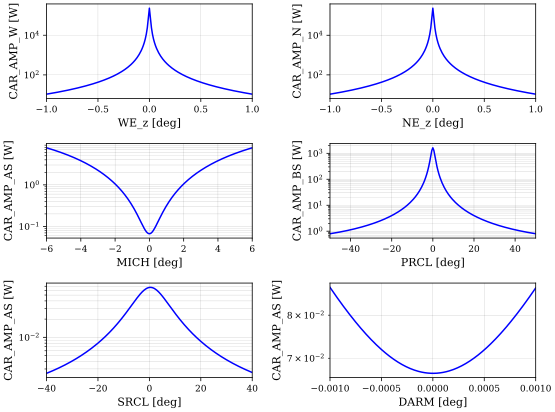

In [19]:
local_file = "virgo_local.kat" 
localvirgo = finesse.virgo.Virgo(local_file)
localvirgo.model.modes(maxtem=2)
localvirgo.adjust_PRC_length()
localvirgo.adjust_SRC_length()
localvirgo.pretune()
localvirgo.print_lengths()
localvirgo.plot_powers();

In [18]:
localvirgo.model.mismatches_table(numfmt="{:.9f}")

In [3]:
print(localvirgo.model.cavPRN.g)

virgo = finesse.virgo.Virgo()
print(virgo.model.cavPRN.g)

[0.85247292 0.8524911 ]
[0.85247236 0.85249054]


In [4]:
localvirgo.pretune()
localvirgo.print_pretune_status()


 ╔══════════════════════════════════════════════════════════════════════════╗
 ║ Pretuned for maxtem = 2, zero_k00 = False                                ║
 ║ Detector     | Power [W] : P. ratio  ║       | Tuning [deg] : Tuning [m] ║
 ╟──────────────┼───────────────────────╫───────┼───────────────────────────╢
 ║ CAR_AMP_PRin |        40 :         1 ║ NE    |       0.0001 :   2.96e-13 ║
 ║ CAR_AMP_N    | 2.481e+05 :      6203 ║ WE    |      -0.0001 :  -2.96e-13 ║
 ║ CAR_AMP_W    | 2.463e+05 :      6158 ║ NI    |       0.0001 :   2.96e-13 ║
 ║ CAR_AMP_BS   |      1751 :     43.77 ║ WI    |      -0.0001 :  -2.96e-13 ║
 ║ CAR_AMP_AS   | 9.432e-07 : 2.358e-08 ║ PR    |       0.0008 :   2.36e-12 ║
 ║              |                       ║ SR    |       0.0060 :   1.77e-11 ║
 ╚══════════════╧═══════════════════════╩═══════╧═══════════════════════════╝


array([<AxesSubplot: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <AxesSubplot: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

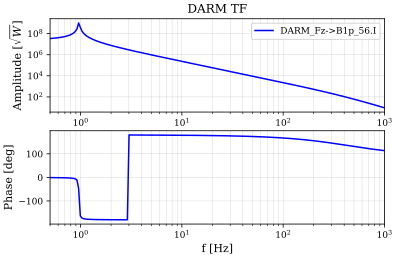

In [5]:
localvirgo.plot_DARM()

In [ ]:
out = localvirgo.model.run('noxaxis()')
iwant = out['pow_bsout']
print(iwant)